In [107]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
languages = ["arabic","chinese","english","french","russian","spanish"]
metrics = ["editors","absolute-bytes","edited-page","edits","netbytediff","newpages"]

user_dataset = []
anon_dataset = []
for lan in languages:
    user_lan_dataset = []
    anon_lan_dataset = []
    for met in metrics:
        file_name = lan+"-"+met+".csv"

        data = pd.read_csv("./data/"+file_name)
        user_data = data["total.user"].to_list()
        anon_data = data["total.anonymous"].to_list()
        user_lan_dataset.append(user_data)
        anon_lan_dataset.append(anon_data)
    user_dataset.append(user_lan_dataset)
    anon_dataset.append(anon_lan_dataset)

In [134]:
def regression(metric, x, y, axs, i, j, user):
    colors = ['red', 'green', 'blue', 'cyan', 'magenta', 'yellow']
    
    user_editors_normalized = (x - np.min(x)) / np.ptp(x)
    metric_user_values_normalized = (y - np.min(y)) / np.ptp(y)

    # Linear regression
    coefficients = np.polyfit(user_editors_normalized, metric_user_values_normalized, 1)
    m = coefficients[0] 
    b = coefficients[1] 
    predicted_y = m * user_editors_normalized + b
    residuals = np.abs(predicted_y - metric_user_values_normalized)
    print("first: " + str(np.sum(residuals)))
    rmse1 = np.sqrt(np.mean(residuals**2))

    # Quardratic regression 
    coefficients2 = np.polyfit(user_editors_normalized, metric_user_values_normalized, 2)
    a2 = coefficients2[0] 
    b2 = coefficients2[1] 
    c2 = coefficients2[2] 
    predicted_y = a2 * user_editors_normalized ** 2 + b2 * user_editors_normalized + c2
    residuals2 = np.abs(predicted_y - metric_user_values_normalized)
    print("second: " + str(np.sum(residuals2)))
    rmse2 = np.sqrt(np.mean(residuals2**2))

    # 3rd degree 
    coefficients3 = np.polyfit(user_editors_normalized, metric_user_values_normalized, 3)
    a3 = coefficients3[0] 
    b3 = coefficients3[1] 
    c3 = coefficients3[2] 
    d3 = coefficients3[3] 
    predicted_y = a3 * user_editors_normalized ** 3 + b3 * user_editors_normalized ** 2 + c3 * user_editors_normalized + d3
    residuals3 = np.abs(predicted_y - metric_user_values_normalized)
    print("third: " + str(np.sum(residuals3)))
    rmse3 = np.sqrt(np.mean(residuals3**2))

    x_values = np.linspace(min(user_editors_normalized), max(user_editors_normalized), 58)
    # if (rmse1 == min(rmse1, rmse2, rmse3)):
    if (np.sum(residuals) == min(np.sum(residuals), np.sum(residuals2), np.sum(residuals3))):
        # print(rmse1)
        y_values = np.polyval(coefficients, x_values)
        axs[j-1].plot(x_values, y_values, color=colors[i-1], label=lan + "-" + metric + "-deg1")
    # elif (rmse2 == min(rmse1, rmse2, rmse3)):
    elif (np.sum(residuals2) == min(np.sum(residuals), np.sum(residuals2), np.sum(residuals3))):
        # print(rmse2)
        y_values = np.polyval(coefficients2, x_values)
        axs[j-1].plot(x_values, y_values, color=colors[i-1], label=lan + "-" + metric + "-deg2")
    else:
        # print(rmse3)
        y_values = np.polyval(coefficients3, x_values)
        axs[j-1].plot(x_values, y_values, color=colors[i-1], label=lan + "-" + metric + "-deg3")

    axs[j-1].legend()
    axs[j-1].set_title(" " + metric + " for " + user)
    axs[j-1].set_xlabel(lan)
    axs[j-1].set_ylabel(metric)
        

first: 6.315031451594665
second: 6.3127123780404135
third: 6.339225853503615
first: 8.022969781023676
second: 7.200478184182106
third: 7.199835158787869
first: 6.7328135144928725
second: 6.662611972435308
third: 6.641411648585353
first: 8.528599797649191
second: 8.179391412209656
third: 8.176211018112712
first: 9.965481038197536
second: 9.866462563127655
third: 9.866152902028702
first: 8.705187578610346
second: 8.635789954564828
third: 8.537805418155756
first: 5.3306824261585195
second: 5.332769771332018
third: 5.367993515007317
first: 8.021687351578173
second: 7.571302606026139
third: 7.397216119230325
first: 5.624187208162484
second: 5.698323500093295
third: 5.848392742345274
first: 9.081034608038427
second: 8.751366915203096
third: 8.740798169543796
first: 5.940880683873464
second: 5.996897064877277
third: 5.992416205161702
first: 3.8497611770279043
second: 3.923622724601786
third: 4.072401990621224
first: 6.284222640827136
second: 6.3604524986441575
third: 6.5621288997974485
first:

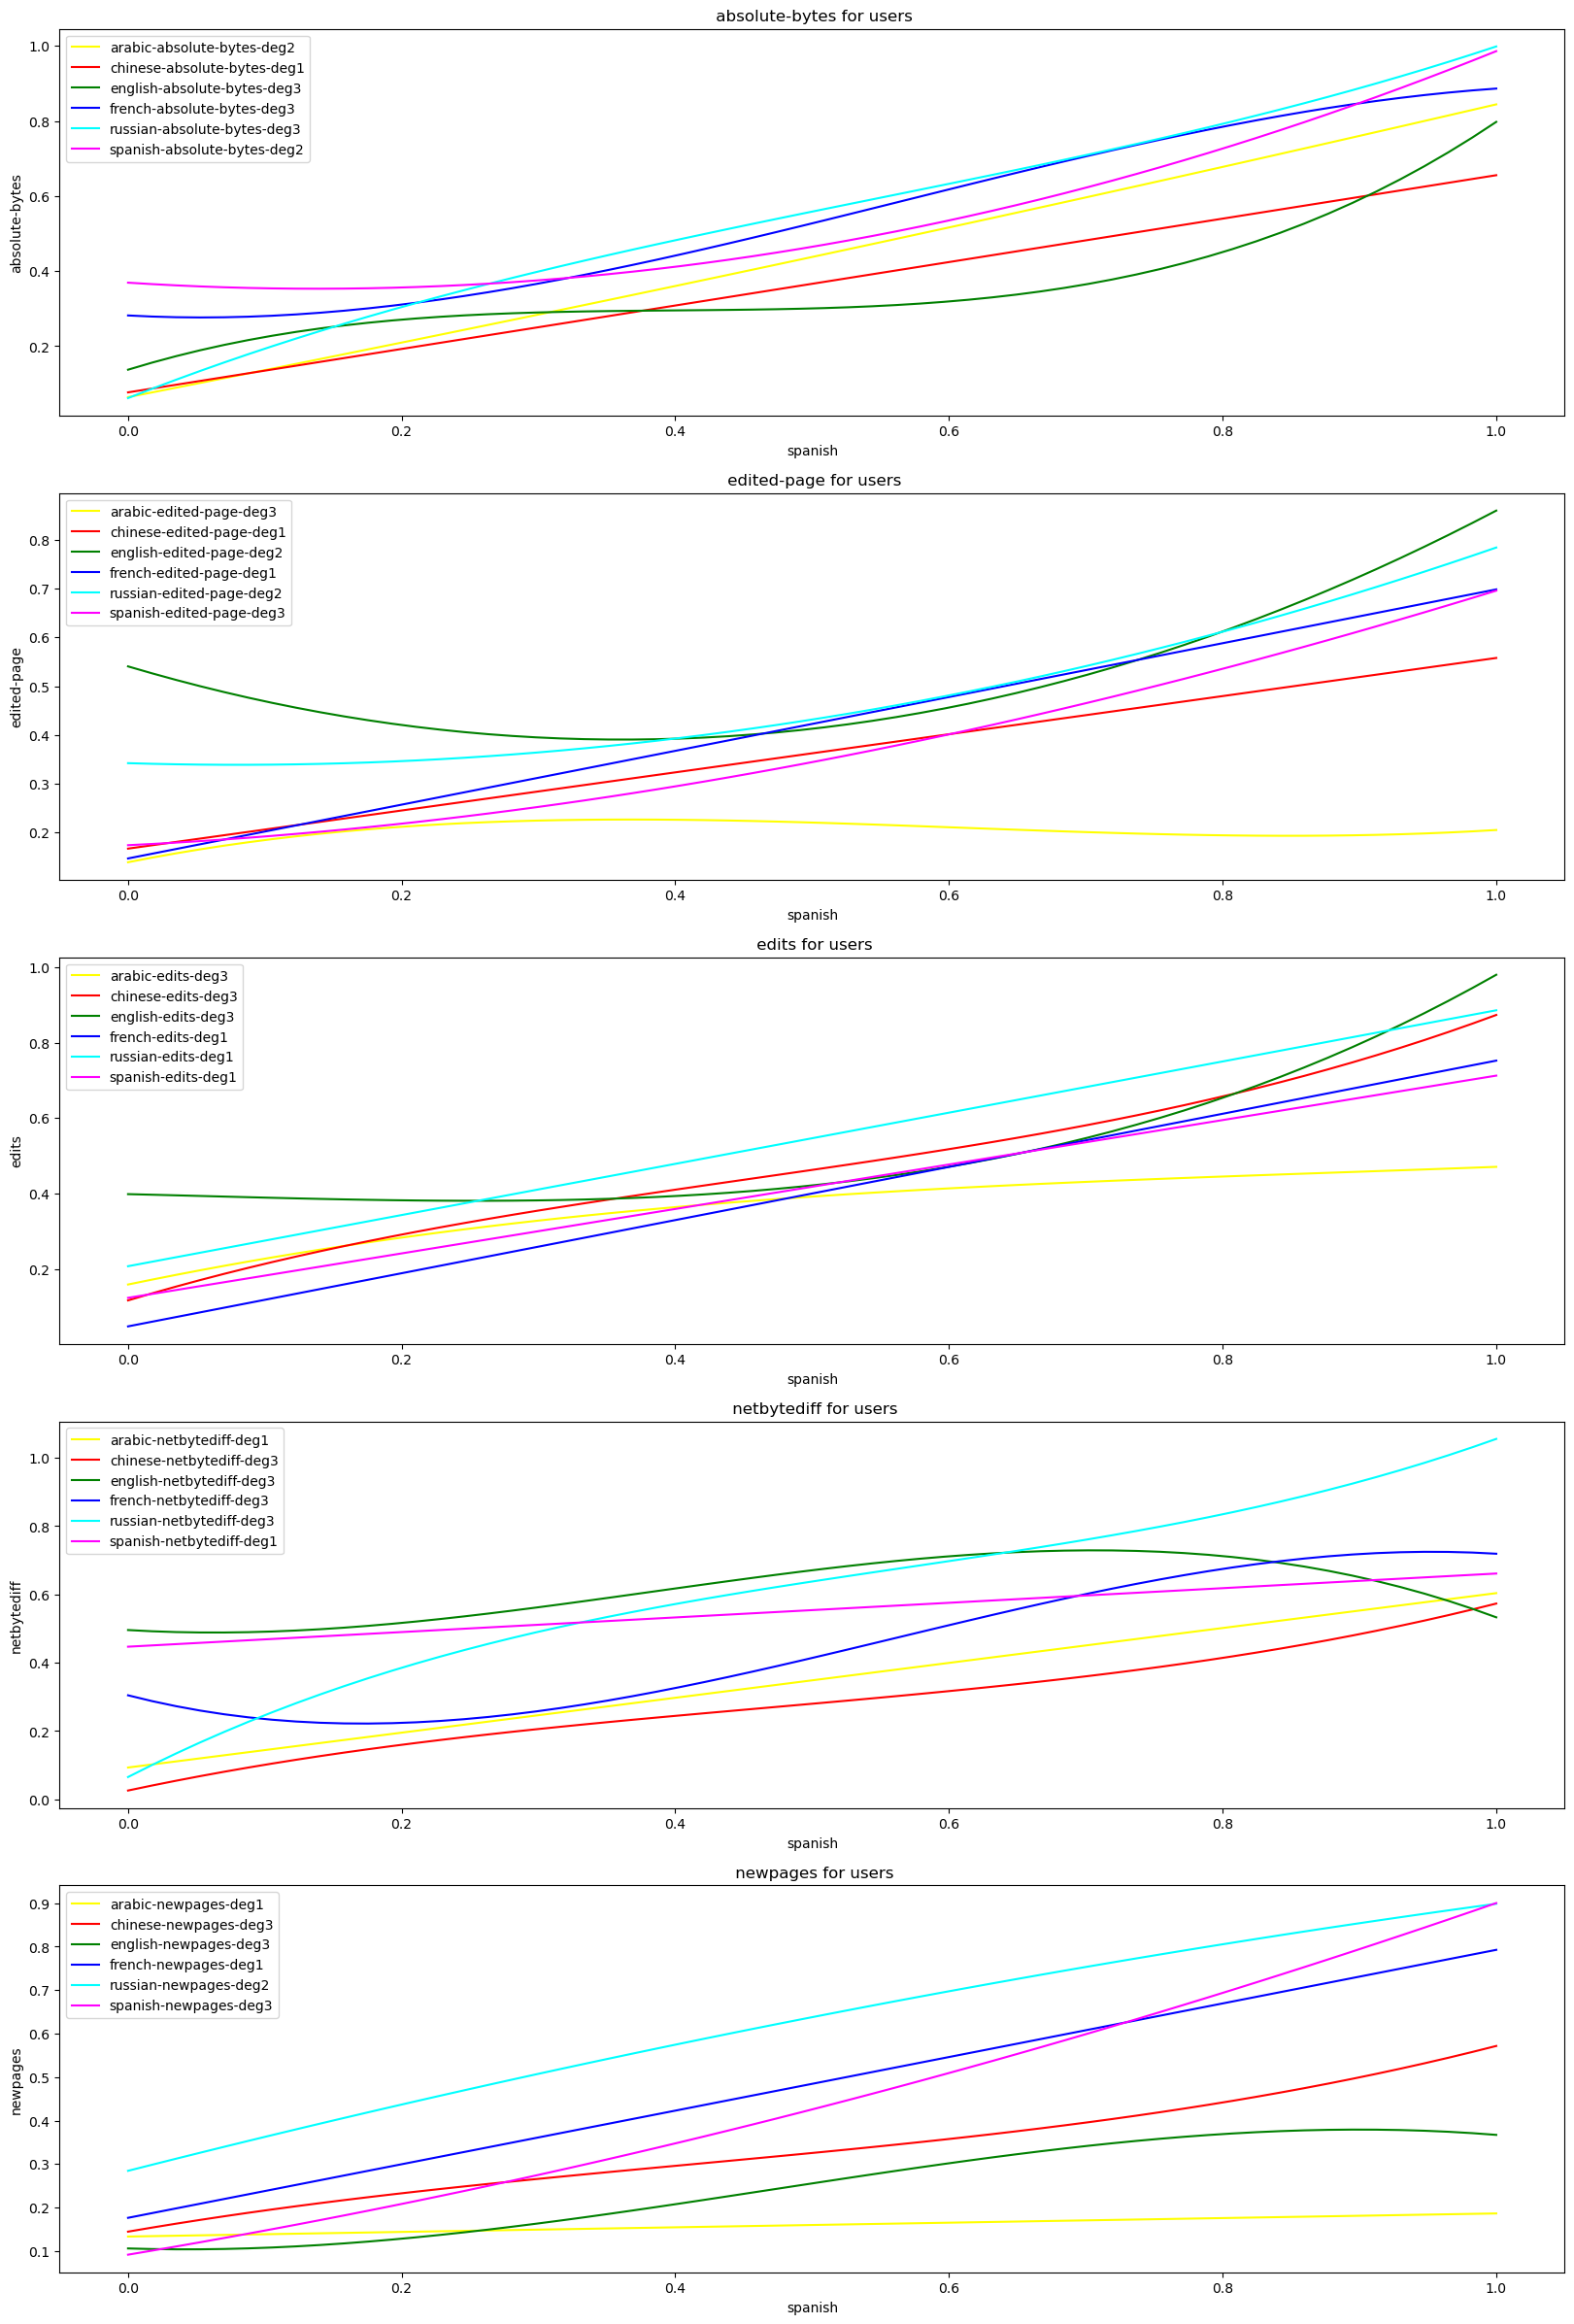

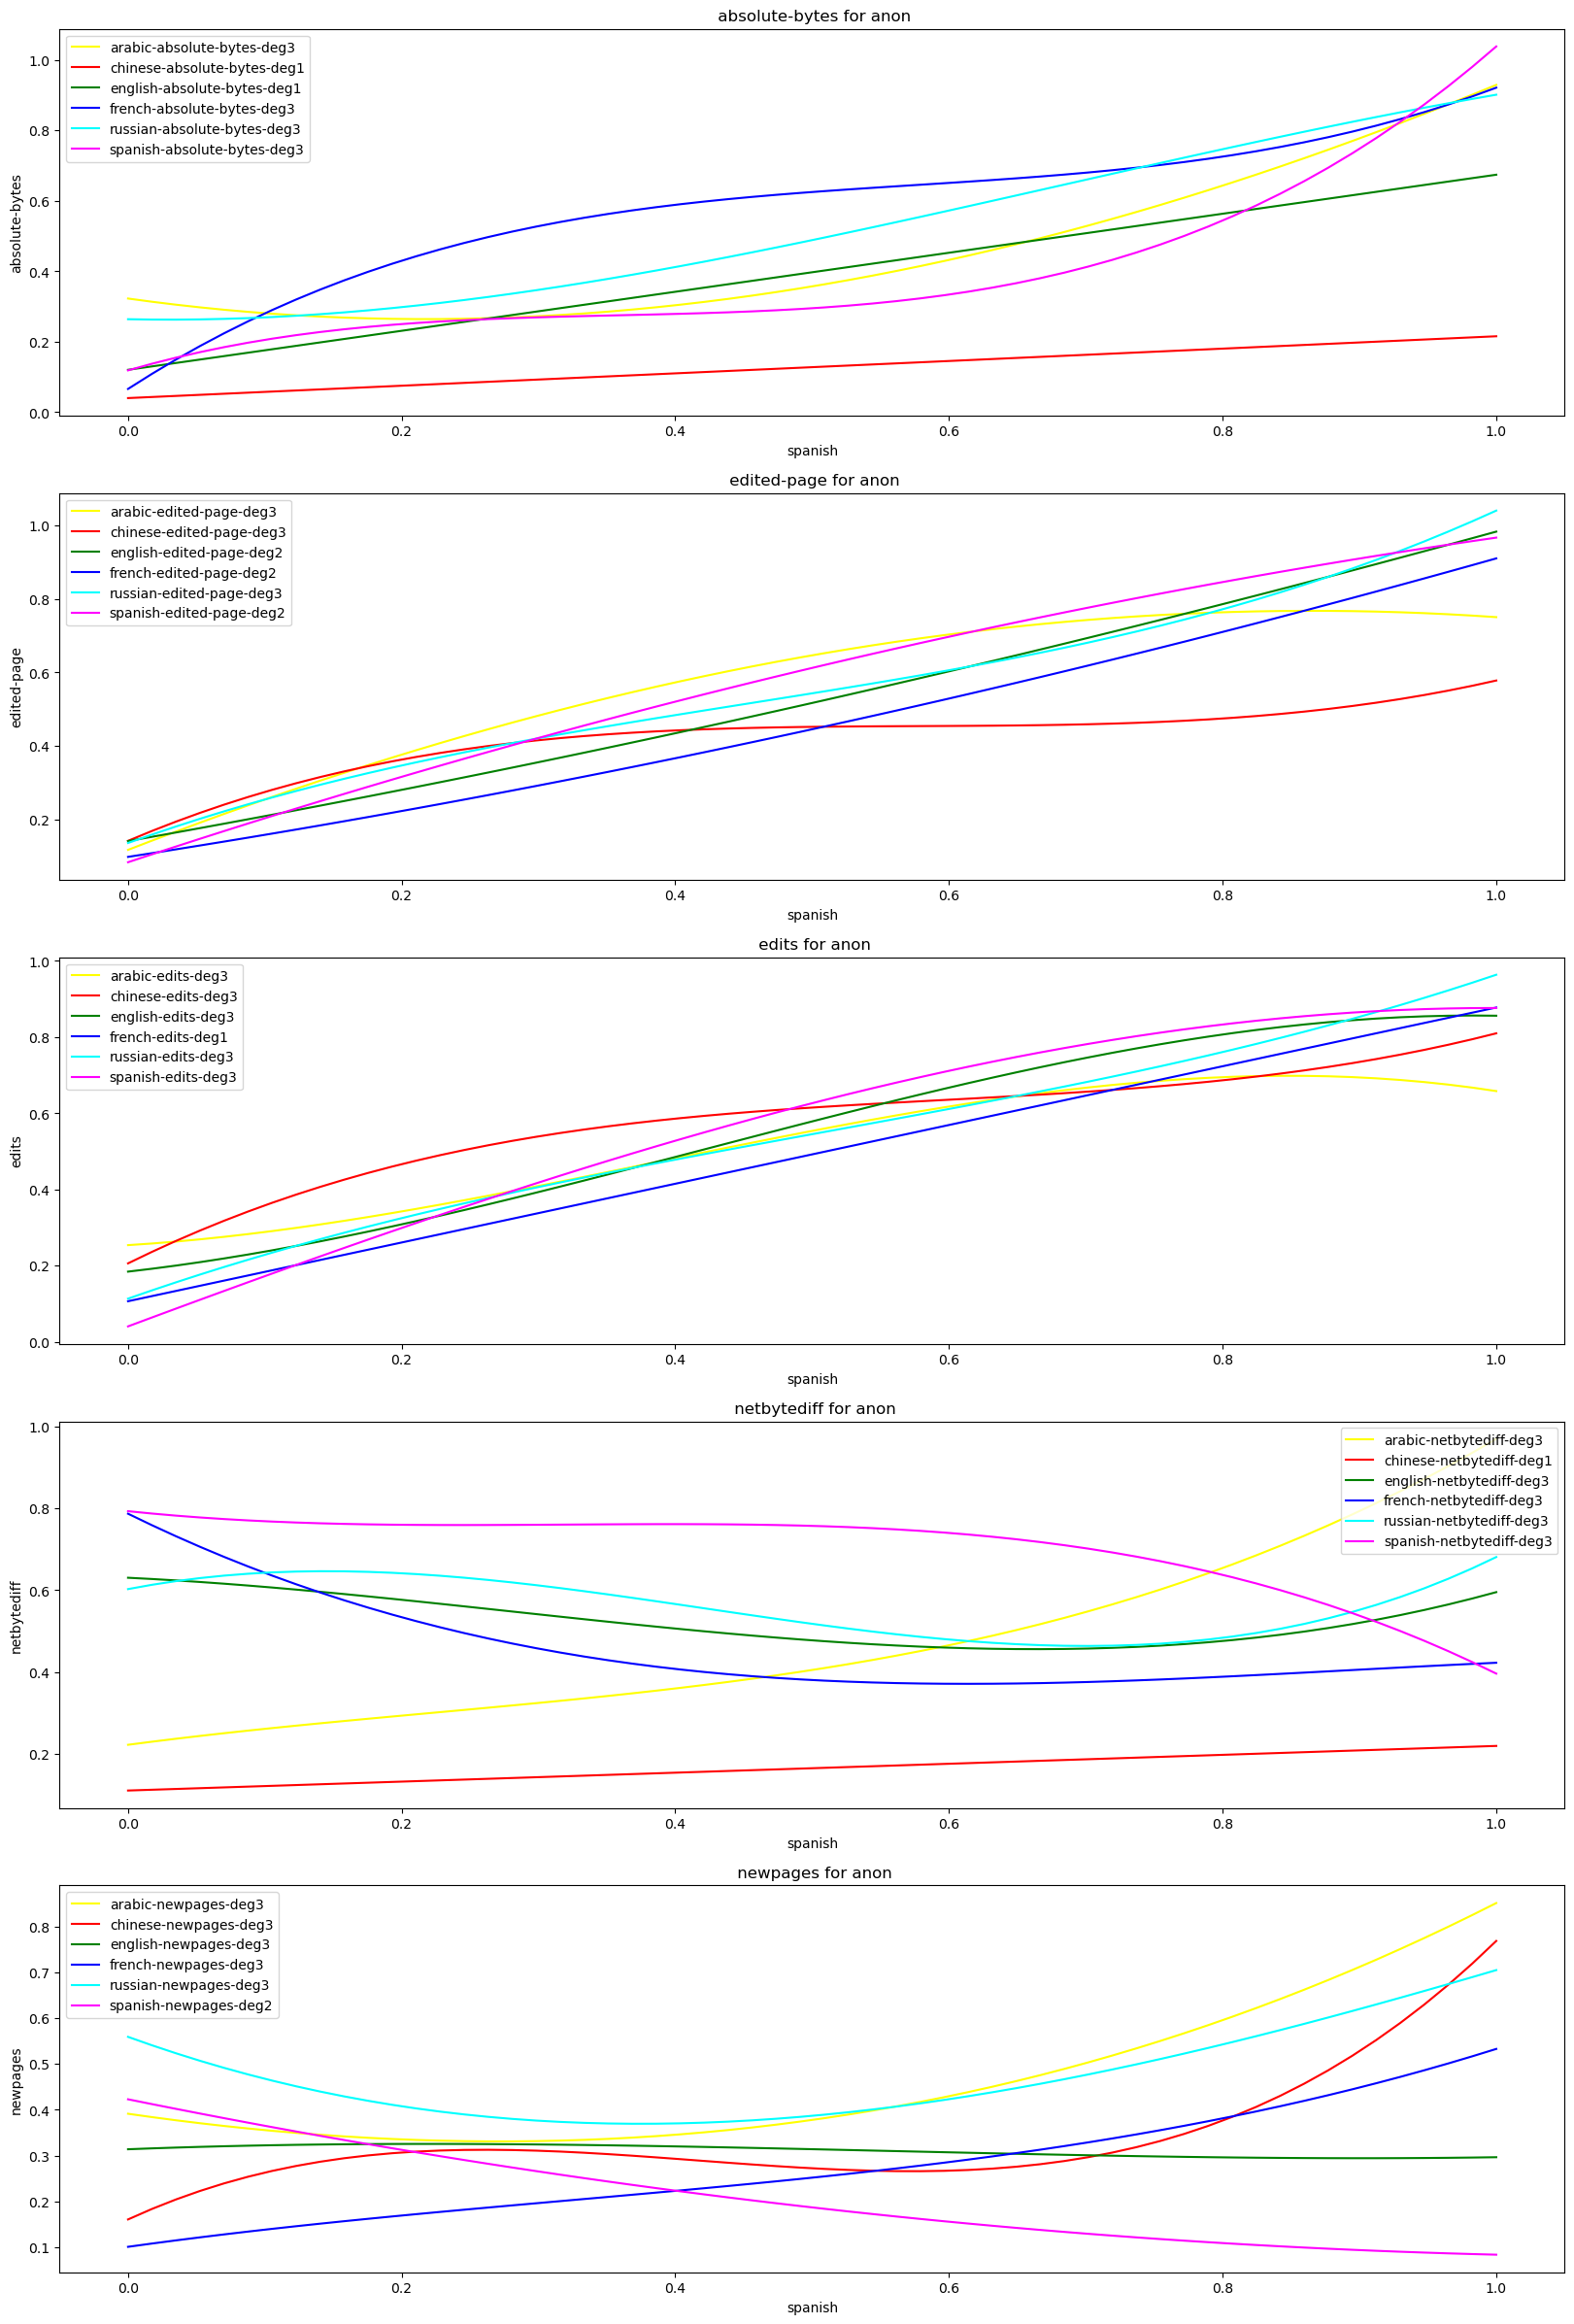

In [135]:
fig, axs = plt.subplots(5, 1, figsize=(20, 30))
fig1, axs1 = plt.subplots(5, 1, figsize=(20, 30))

for i in range(len(user_dataset)):
    lan = languages[i]
    user_lan_dataset = user_dataset[i]
    anon_lan_dataset = anon_dataset[i]
    
    #number of editors
    user_editors = user_lan_dataset[0]
    anon_editors = anon_lan_dataset[0]
    pcc_user = []
    pp_user = []
    pcc_anon = []
    pp_anon = []

    for j in range(1, len(user_dataset)):
        metric = metrics[j]
        metric_user_values = user_lan_dataset[j]
        metric_anon_values = anon_lan_dataset[j]

        # plt.scatter(user_editors, metric_user_values, color='blue', marker='o')
        regression(metric, user_editors, metric_user_values, axs, i, j, "users")

        regression(metric, user_editors, metric_anon_values, axs1, i, j, "anon")

        correlation_user, p_value_user = pearsonr(user_editors, metric_user_values)
        pcc_user.append(correlation_user)
        pp_user.append(p_value_user)

        correlation_anon, p_value_anon = pearsonr(anon_editors, metric_anon_values)
        pcc_anon.append(correlation_anon)
        pp_anon.append(p_value_anon)

fig.savefig('graphs/regression-user.png')
fig1.savefig('graphs/regression-anon.png')

    # csv_file = 'stats/pearson-cc-user.csv'
    # with open(csv_file, 'a', newline='') as file:
    #     writer = csv.writer(file)
    #     writer.writerow(pcc_user)

    # csv_file = 'stats/pearson-p-user.csv'
    # with open(csv_file, 'a', newline='') as file:
    #     writer = csv.writer(file)
    #     writer.writerow(pp_user)

    # csv_file = 'stats/pearson-cc-anon.csv'
    # with open(csv_file, 'a', newline='') as file:
    #     writer = csv.writer(file)
    #     writer.writerow(pcc_anon)

    # csv_file = 'stats/pearson-p-anon.csv'
    # with open(csv_file, 'a', newline='') as file:
    #     writer = csv.writer(file)
    #     writer.writerow(pp_anon)

In [133]:
def plot(file_name,title,color="viridis"):
    pcc_users = pd.read_csv("stats/" + file_name + ".csv", header = None)

    sns.heatmap(pcc_users, 
                xticklabels=metrics[1:], 
                yticklabels=languages, 
                cmap=color, 
                vmax=1,
                vmin=-1,
                annot=True, 
                fmt=".2f")

    plt.title(title)
    plt.savefig('graphs/'+file_name)
    plt.show()

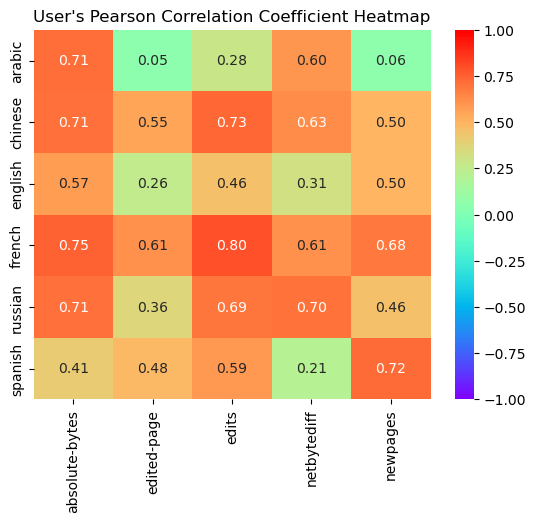

In [112]:
title = "User's Pearson Correlation Coefficient Heatmap"
plot("pearson-cc-user",title,"rainbow")

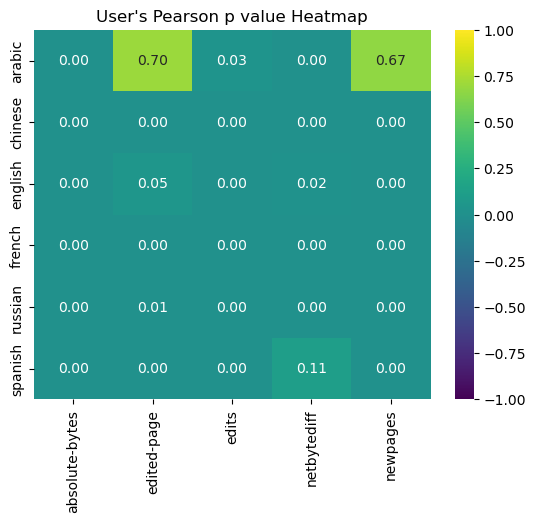

In [113]:
title = "User's Pearson p value Heatmap"
plot("pearson-p-user",title)

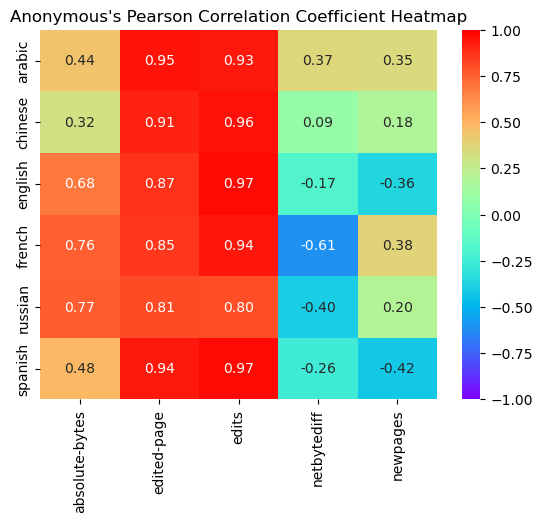

In [114]:
title = "Anonymous's Pearson Correlation Coefficient Heatmap"
plot("pearson-cc-anon",title,"rainbow")

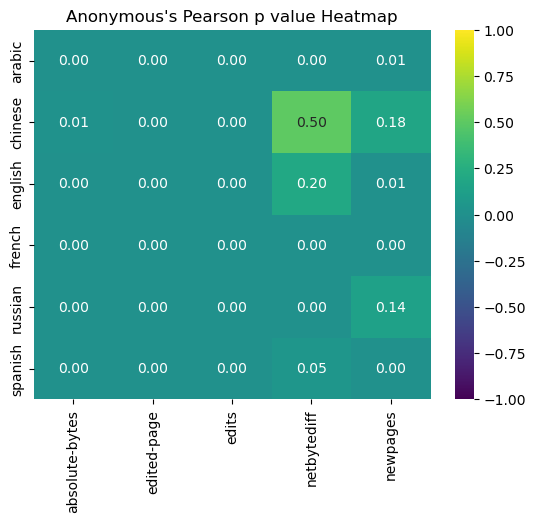

In [115]:
title = "Anonymous's Pearson p value Heatmap"
plot("pearson-p-anon",title)

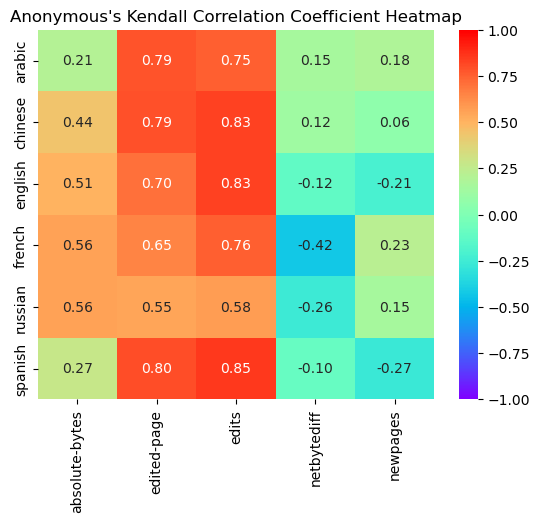

In [116]:
title = "Anonymous's Kendall Correlation Coefficient Heatmap"
plot("kendall-cc-anon",title,"rainbow")

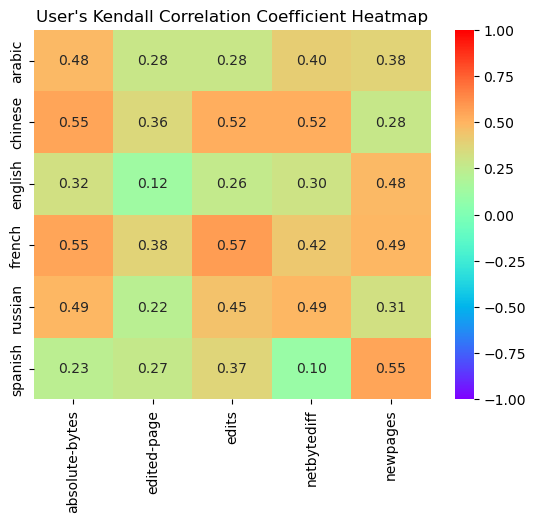

In [117]:
title = "User's Kendall Correlation Coefficient Heatmap"
plot("kendall-cc-user",title,"rainbow")

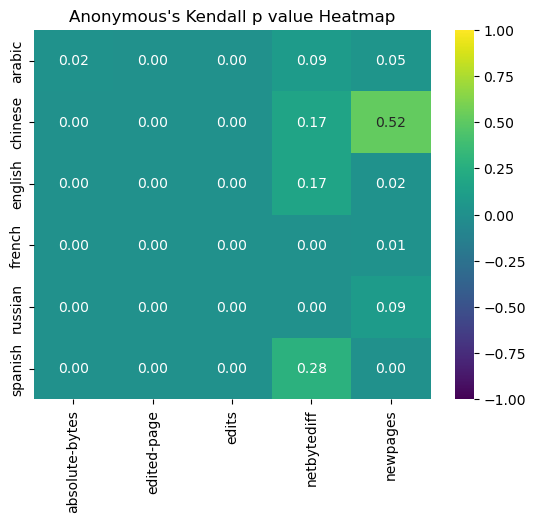

In [118]:
title = "Anonymous's Kendall p value Heatmap"
plot("kendall-p-anon", title)

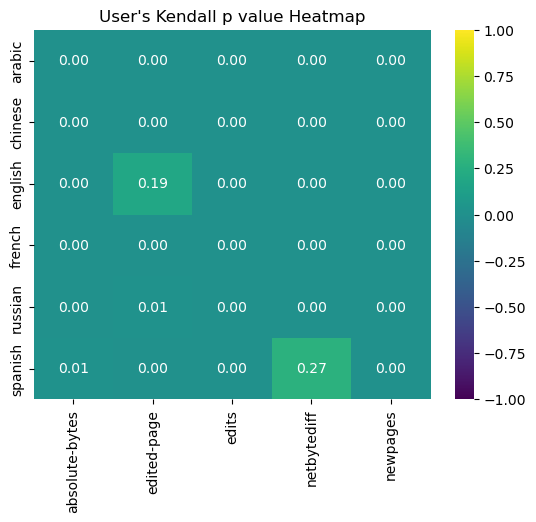

In [119]:
title = "User's Kendall p value Heatmap"
plot("kendall-p-user", title)

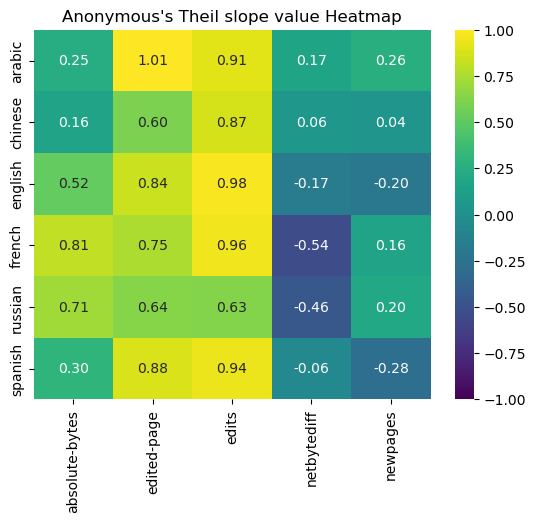

In [120]:
title = "Anonymous's Theil slope value Heatmap"
plot("theil-slope-anon", title)